# Problem Description

**under construction**

*Let us understand **how to create a baseline model** with the use of a time-series example.* 

*Suppose our company sells licences of a software product and we want to understand how many licences we will sell in the future. We can use time-series models like ARIMA as well as machine-learning approaches (see unit 3 of the course book) for that purpose.*

*We should always compare our model approaches with simple, so-called baseline models. Perhaps we observe, that all our sophisticated model approaches do not show better performance than simple baseline models. Then we should cease our effort, go a step back and take a closer look at our explanatory variables, i.e., the features of our model.*

# Preambel

In [1]:
# Common imports
import numpy as np # numpy is THE toolbox for scientific computing with python
import pandas as pd # pandas provides THE data structure and data analysis tools for data scientists 
import pickle # we have to import a pickle file
import os 
from datetime import timedelta, date

# maximum number of columns
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Time-Series Data Creation

*Let us create a dataset of how many software licences are sold.* 

In [2]:
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2018, 1, 1)
end_dt   = date(2022, 12, 31)

date_vec = [];
for dt in daterange(start_dt, end_dt):
    date_vec.append(dt) 
    
salesByDate = pd.DataFrame.from_dict({'date': date_vec, 'sales':np.nan})

In [3]:
salesByDate.date = pd.to_datetime(salesByDate.date)

salesByDate['weekday']  = salesByDate['date'].dt.weekday
salesByDate['monthday'] = salesByDate['date'].dt.day
salesByDate['month']    = salesByDate['date'].dt.month
salesByDate['year']     = salesByDate['date'].dt.year

*Let us now assume the number of sold licences to be a function of weekday, year, month and some random noise.*

In [4]:
np.random.seed(42)
basic_sales = 500;
salesByDate['sales'] = np.ceil(np.cos((salesByDate['weekday']-1)/6) * basic_sales + 0.3*(salesByDate['year']-2018+1)*basic_sales - (salesByDate['month']-7) + np.random.randint(100,1000, salesByDate.shape[0]))

*Let us now look at our dataset.*

In [5]:
salesByDate.head(10)

,date,sales,weekday,monthday,month,year
0,2018-01-01,852.0,0,1,1,2018
1,2018-01-02,1191.0,1,2,1,2018
2,2018-01-03,1610.0,2,3,1,2018
3,2018-01-04,999.0,3,4,1,2018
4,2018-01-05,801.0,4,5,1,2018
5,2018-01-06,720.0,5,6,1,2018
6,2018-01-07,1293.0,6,7,1,2018
7,2018-01-08,770.0,0,8,1,2018
8,2018-01-09,1370.0,1,9,1,2018
9,2018-01-10,871.0,2,10,1,2018


# Time-Series Plots

The number of daily sales as a function of day.

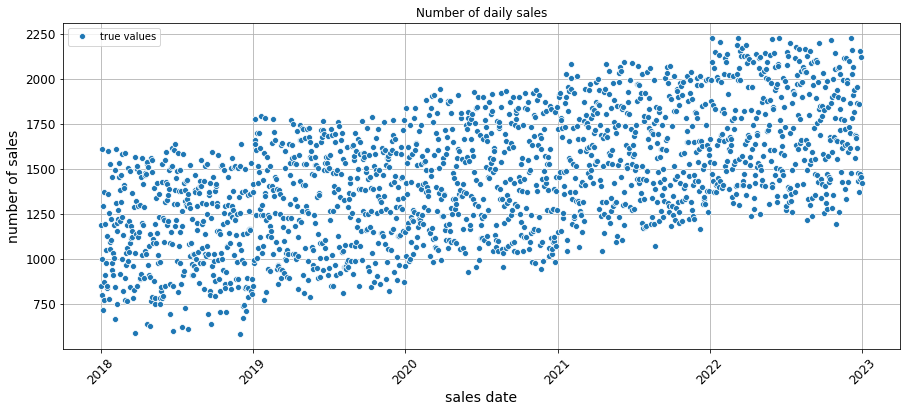

In [9]:
mask = (salesByDate.date >= '2018-01-01')
title =  'Number of daily sales'
fig, axs = plt.subplots(1,1,figsize=(15,6))
sns.lineplot(data = salesByDate[mask], x = 'date', y = 'sales', marker='o', linestyle='', ci = None, label = 'true values')#ci = None)
plt.title(title)
plt.xlabel('sales date')
plt.xticks(rotation=45)
plt.ylabel('number of sales')
plt.grid(True)
plt.legend()
plt.show()

Here the dependence of daily sales on our feature variables is shown:

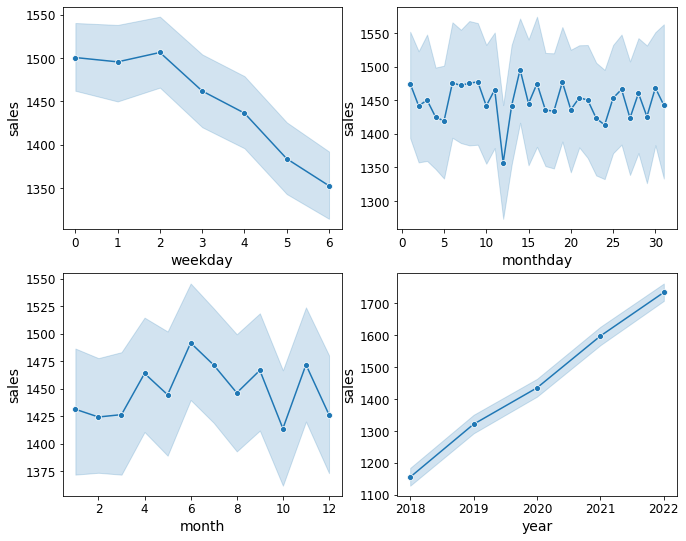

In [11]:
plt.figure(figsize=(11, 9))

i = 0
for col in salesByDate.columns[2:]:
    i+=1
    plt.subplot(2, 2, i)
    ax = sns.lineplot(x=col, y="sales", marker='o', data=salesByDate)
plt.show()

# Train-test Split

In a first step we have to split the data into training and test set.

In [29]:
val_start  = '2021-09-01'
val_end    = '2021-11-26'
test_start = '2021-11-27'

print()
print('Train begin - end: ', salesByDate.date.min(), ' - ', train_end)
print('Val begin - end: ', val_start, ' - ', val_end)
print('Test begin - end: ', test_start, ' - ', max_date)
print()

# ================================================================
mask_val    = (salesByDate.date >= val_start) & (salesByDate.date <= val_end) 
mask_test   = (salesByDate.date >= test_start) 

salesByDate_val  = salesByDate[mask_val]
salesByDate_test = salesByDate[mask_test]
salesByDate_train = salesByDate.drop(salesByDate_test.index).drop(salesByDate_val.index)


Train begin - end:  2018-01-01 00:00:00  -  2022-09-22T00:00:00.000000000
Val begin - end:  2021-09-01  -  2021-11-26
Test begin - end:  2021-11-27  -  2022-12-31 00:00:00



In [30]:
salesByDate_test.head(5)

,date,sales,weekday,monthday,month,year
1426,2021-11-27,1814.0,5,27,11,2021
1427,2021-11-28,1811.0,6,28,11,2021
1428,2021-11-29,1596.0,0,29,11,2021
1429,2021-11-30,1964.0,1,30,11,2021
1430,2021-12-01,2002.0,2,1,12,2021


# Benchmark Models

*After setting up the dataset, a first EDA (=exploratory data analysis) and the train-test split we start to build our first models, so-called **baseline models**. These are simple models, which gives us a lower threshold for our modeling accuracy.*

## Overall Mean Value

The simplest benchmark model is to predict **the mean/median for future days**.

In [32]:
mean_val = np.round(salesByDate_train['sales'].mean(),5)

In [33]:
salesByDate_train['benchmark_mean'] = mean_val
salesByDate_val['benchmark_mean']   = mean_val
salesByDate_test['benchmark_mean']  = mean_val

C:\Users\A062471\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\A062471\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
salesByDate_train.head(5)

,date,sales,weekday,monthday,month,year,benchmark_mean
0,2018-01-01,852.0,0,1,1,2018,1357.15385
1,2018-01-02,1191.0,1,2,1,2018,1357.15385
2,2018-01-03,1610.0,2,3,1,2018,1357.15385
3,2018-01-04,999.0,3,4,1,2018,1357.15385
4,2018-01-05,801.0,4,5,1,2018,1357.15385


Now we collect some metrics to evaluate the model.

In [20]:
def eval_metrics(y_true, y_pred, dat_type):
    ''' 
    Collect the evaluation metrics for the sales forecast

    Input:
    ======
    y_true: float

    y_hat: float

    dat_type: string
              'train', 'val', 'test

    Output:
    ========

    >>> eval_metrics(salesByDate_train['benchmark_mean'], salesByDate_train['sales'], 'train')
    '''
    train_error        = np.sqrt(mean_squared_error(y_true, y_pred))
    train_log_error    = mean_squared_log_error(y_true, y_pred)
    train_medabs_error = median_absolute_error(y_true, y_pred)
    train_perc_err     = (np.abs((y_true-y_pred)/y_true)>0.2).astype(float).sum()/len(y_true)

    print('==============================================')
    print('Results:')
    print('Average ', dat_type, ' RMSE:           %.3f' %train_error)
    print('Average ', dat_type, ' LMSE:           %.3f' %train_log_error)
    print('Average ', dat_type, ' MEDAE:          %.3f' %train_medabs_error)
    print('Abs % 20% off ', dat_type, ':          {} %'.format(round(train_perc_err*100,2)))
    print('# data points {}'.format(len(y_true)))
    print('==============================================')

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error

eval_metrics(salesByDate_train['benchmark_mean'], salesByDate_train['sales'], 'train')
eval_metrics(salesByDate_val['benchmark_mean'], salesByDate_val['sales'], 'val')
eval_metrics(salesByDate_test['benchmark_mean'], salesByDate_test['sales'], 'test')

Results:
Average  train  RMSE:           312.907
Average  train  LMSE:           0.060
Average  train  MEDAE:          234.154
Abs % 20% off  train :          43.17 %
# data points 1339
Results:
Average  val  RMSE:           356.922
Average  val  LMSE:           0.049
Average  val  MEDAE:          172.154
Abs % 20% off  val :          42.53 %
# data points 87
Results:
Average  test  RMSE:           458.584
Average  test  LMSE:           0.077
Average  test  MEDAE:          332.846
Abs % 20% off  test :          59.5 %
# data points 400


## Mean by month

In [36]:
calc = np.ceil(salesByDate_train.groupby('month')['sales'].mean()).to_frame('benchmark_mean_month').reset_index()

salesByDate_train = pd.merge(calc, salesByDate_train, on = 'month')
salesByDate_val   = pd.merge(calc, salesByDate_val, on = 'month')
salesByDate_test  = pd.merge(calc, salesByDate_test, on = 'month')

In [42]:
salesByDate_val.head(5)

,month,benchmark_mean_month,date,sales,weekday,monthday,year,benchmark_mean
0,9,1338.0,2021-09-01,1814.0,2,1,2021,1357.15385
1,9,1338.0,2021-09-02,1839.0,3,2,2021,1357.15385
2,9,1338.0,2021-09-03,1425.0,4,3,2021,1357.15385
3,9,1338.0,2021-09-04,1568.0,5,4,2021,1357.15385
4,9,1338.0,2021-09-05,1265.0,6,5,2021,1357.15385


In [43]:
eval_metrics(salesByDate_train['benchmark_mean_month'], salesByDate_train['sales'], 'train')
eval_metrics(salesByDate_val['benchmark_mean_month'], salesByDate_val['sales'], 'val')
eval_metrics(salesByDate_test['benchmark_mean_month'], salesByDate_test['sales'], 'test')

Results:
Average  train  RMSE:           309.604
Average  train  LMSE:           0.059
Average  train  MEDAE:          237.000
Abs % 20% off  train :          43.24 %
# data points 1339
Results:
Average  val  RMSE:           382.363
Average  val  LMSE:           0.058
Average  val  MEDAE:          228.000
Abs % 20% off  val :          47.13 %
# data points 87
Results:
Average  test  RMSE:           468.481
Average  test  LMSE:           0.082
Average  test  MEDAE:          369.000
Abs % 20% off  test :          61.75 %
# data points 400


*Now the mean value by week, weekday...could be used as well.*

## Rolling Mean of Last Week

*A more advanced model is to use the rolling mean of the last week. But be careful: Here we use the information starting from the 8th day before the observation.*

In [52]:
salesByDate_train["benchmark_MA_roll_7"] = salesByDate_train['sales'].rolling(window=7).mean()
salesByDate_val["benchmark_MA_roll_7"] = salesByDate_val['sales'].rolling(window=7).mean()
salesByDate_test["benchmark_MA_roll_7"] = salesByDate_test['sales'].rolling(window=7).mean()

In [47]:
salesByDate_train.head(10)

,month,benchmark_mean_month,date,sales,weekday,monthday,year,benchmark_mean,benchmark_MA_roll_7
0,1,1356.0,2018-01-01,852.0,0,1,2018,1357.15385,NaN
1,1,1356.0,2018-01-02,1191.0,1,2,2018,1357.15385,NaN
2,1,1356.0,2018-01-03,1610.0,2,3,2018,1357.15385,NaN
3,1,1356.0,2018-01-04,999.0,3,4,2018,1357.15385,NaN
4,1,1356.0,2018-01-05,801.0,4,5,2018,1357.15385,NaN
5,1,1356.0,2018-01-06,720.0,5,6,2018,1357.15385,NaN
6,1,1356.0,2018-01-07,1293.0,6,7,2018,1357.15385,1066.571429
7,1,1356.0,2018-01-08,770.0,0,8,2018,1357.15385,1054.857143
8,1,1356.0,2018-01-09,1370.0,1,9,2018,1357.15385,1080.428571
9,1,1356.0,2018-01-10,871.0,2,10,2018,1357.15385,974.857143


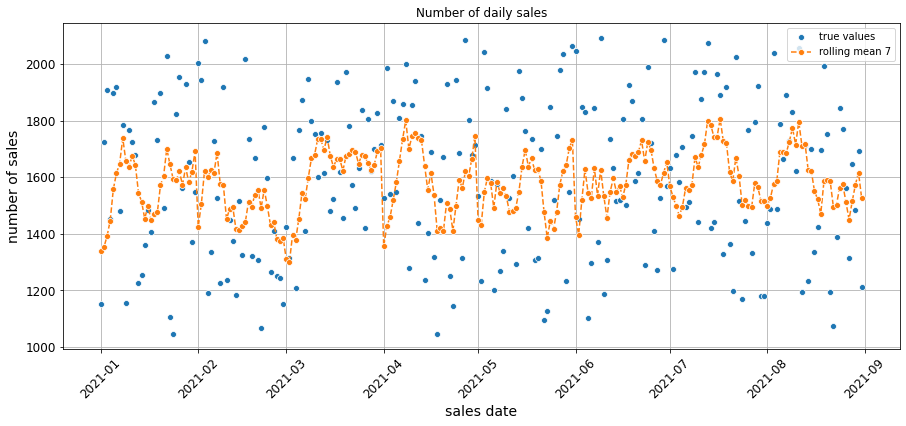

In [50]:
mask = (salesByDate_train.date >= '2021-01-01')
title =  'Number of daily sales'
fig, axs = plt.subplots(1,1,figsize=(15,6))
sns.lineplot(data = salesByDate_train[mask], x = 'date', y = 'sales', marker='o', linestyle='', ci = None, label = 'true values')#ci = None)
sns.lineplot(data = salesByDate_train[mask], x = 'date', y = 'benchmark_MA_roll_7', marker='o', linestyle='--', ci = None, label = 'rolling mean 7')#ci = None)

plt.title(title)
plt.xlabel('sales date')
plt.xticks(rotation=45)
plt.ylabel('number of sales')
plt.grid(True)
plt.legend()
plt.show()

In [61]:
# [item for item in salesByDate_train['benchmark_MA_roll_7'] if not(pd.isnull(item)) == True]

In [63]:
train = salesByDate_train[~salesByDate_train.benchmark_MA_roll_7.isna()]
val   = salesByDate_val[~salesByDate_val.benchmark_MA_roll_7.isna()]
test  = salesByDate_test[~salesByDate_test.benchmark_MA_roll_7.isna()]

eval_metrics(train['benchmark_MA_roll_7'], train['sales'], 'train')
eval_metrics(val['benchmark_MA_roll_7'], val['sales'], 'val')
eval_metrics(test['benchmark_MA_roll_7'], test['sales'], 'test')

Results:
Average  train  RMSE:           259.778
Average  train  LMSE:           0.041
Average  train  MEDAE:          199.286
Abs % 20% off  train :          35.48 %
# data points 1333
Results:
Average  val  RMSE:           258.229
Average  val  LMSE:           0.027
Average  val  MEDAE:          216.857
Abs % 20% off  val :          25.93 %
# data points 81
Results:
Average  test  RMSE:           254.418
Average  test  LMSE:           0.023
Average  test  MEDAE:          210.857
Abs % 20% off  test :          18.27 %
# data points 394


## Linear Regression

*As a last benachmark model we consider a simple linear regression.*

In [77]:
pd.get_dummies(salesByDate_train[['month', 'weekday', 'monthday', 'year']].astype(str)).head(5)

,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,monthday_1,monthday_10,monthday_11,monthday_12,monthday_13,monthday_14,monthday_15,monthday_16,monthday_17,monthday_18,monthday_19,monthday_2,monthday_20,monthday_21,monthday_22,monthday_23,monthday_24,monthday_25,monthday_26,monthday_27,monthday_28,monthday_29,monthday_3,monthday_30,monthday_31,monthday_4,monthday_5,monthday_6,monthday_7,monthday_8,monthday_9,year_2018,year_2019,year_2020,year_2021
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [74]:
X_train = salesByDate_train[['month', 'weekday', 'monthday', 'year']]
X_val   = salesByDate_val[['month', 'weekday', 'monthday', 'year']]
X_test  = salesByDate_test[['month', 'weekday', 'monthday', 'year']]

y_train = np.array(salesByDate_train.sales)
y_val   = np.array(salesByDate_val.sales)
y_test  = np.array(salesByDate_test.sales)

In [75]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, random_state = 42)
ridge_reg.fit(X_train,y_train)
print('INTERCEPT: ', ridge_reg.intercept_)
print('COEFFS: ', ridge_reg.coef_.round(5))
print()
print('R2 score: ', ridge_reg.score(X_train, y_train))
print('RMSE    : ', np.sqrt(mean_squared_error(ridge_reg.predict(X_train), y_train)))
print()

INTERCEPT:  -290132.2148277865
COEFFS:  [  1.41022 -26.62819  -0.2158  144.38403]

R2 score:  0.2694041313660873
RMSE    :  267.45712327072255



In [78]:
X_train = pd.get_dummies(salesByDate_train[['month', 'weekday', 'monthday', 'year']].astype(str))
X_val   = pd.get_dummies(salesByDate_val[['month', 'weekday', 'monthday', 'year']].astype(str))
X_test  = pd.get_dummies(salesByDate_test[['month', 'weekday', 'monthday', 'year']].astype(str))

y_train = np.array(salesByDate_train.sales)
y_val   = np.array(salesByDate_val.sales)
y_test  = np.array(salesByDate_test.sales)

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, random_state = 42)
ridge_reg.fit(X_train,y_train)
print('INTERCEPT: ', ridge_reg.intercept_)
print('COEFFS: ', ridge_reg.coef_.round(5))
print()
print('R2 score: ', ridge_reg.score(X_train, y_train))
print('RMSE    : ', np.sqrt(mean_squared_error(ridge_reg.predict(X_train), y_train)))
print()

INTERCEPT:  1377.1658113115316
COEFFS:  [ -22.63413  -20.30492   31.68384  -44.54506  -23.51642  -31.45663
   24.05841  -14.25436   51.38075   35.04096  -19.35527   33.90285
   75.19061   28.57498   52.57626    8.9057    -3.92806  -79.28782
  -82.03167   31.66876   17.57313   13.52987 -104.50261  -33.41302
   56.55335  -27.93124   12.54779    4.41758   -1.67013   18.31961
   -3.65221  -34.14636   17.68668   35.44654  -72.45221    1.68424
   42.48543    3.96406  -31.96858   11.97557  -49.83812   -0.84909
   65.03843  -16.16273   -8.20346  -27.92483   30.49809   14.97557
   -4.17569   38.52557 -221.475    -56.22195   57.41158  220.28537]

R2 score:  0.2981244601323352
RMSE    :  262.14743754187117



In [80]:
y_train = ridge_reg.predict(X_train)

In [81]:
eval_metrics(y_train, salesByDate_train['sales'], 'train')

Results:
Average  train  RMSE:           262.147
Average  train  LMSE:           0.042
Average  train  MEDAE:          225.488
Abs % 20% off  train :          38.69 %
# data points 1339


## Comparing the benchmark models

In [64]:
def rms_error(true, pred):
    diff=(true-pred).dropna()
    return np.sqrt((diff**2).mean())

In [68]:
for col in ['benchmark_mean', 'benchmark_mean_month', 'benchmark_MA_roll_7']:
    print('BENCHMARK {} : {}'.format(col, rms_error(salesByDate_train['sales'], salesByDate_train[col])))

BENCHMARK benchmark_mean : 312.9072048159962
BENCHMARK benchmark_mean_month : 309.6040172512833
BENCHMARK benchmark_MA_roll_7 : 259.77826851825273


Here we observe that the rolling mean benchmark model gives the best result, i.e. the error on the daily number of sales is around 260 licenses. The Ridge regression (without using autocorrelative features) has around the same error. 

Now the challenge is to find a more sophisticated model which outperforms the benchmark models. 

# Predictive Models

Here we can start with modeling the time-series data in order to outperform the benchmarks.